In [ ]:
Madison Mariani Section B

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_data = pd.read_csv('titanic.csv')

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [53]:
titanic_data.describe()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.445196,32.204208,0.381594,446.000000,2.308642,0.647587,0.523008,0.383838,0.904602
std,13.244896,49.693429,0.806057,257.353842,0.836071,0.477990,1.102743,0.486592,1.613459
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,446.000000,3.000000,1.000000,0.000000,0.000000,0.000000
75%,35.500000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,1.000000,8.000000,1.000000,10.000000


Your written answer:

 - 891 passengers are recorded in this log
 - 64.76% percent are male
 - 38.38% percent survived

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [49]:
female_SR = titanic_data[titanic_data['Sex'] == 0]['Survived'].mean() * 100
female_SR
male_SR = titanic_data[titanic_data['Sex'] == 1]['Survived'].mean() * 100
male_SR



18.890814558058924

Your written answer:

 - 74 (74.20382165605095) females survived
 - 18 (18.890814558058924) males survived

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [ ]:
# EXAMPLE USING GROUPBY AND AGG:

# Group by 'Sex' and aggregate total count, survival count, and survival rate
survival_stats = titanic_data.groupby('Sex').agg(
    total_passengers=('PassengerId', 'count'),
    total_survived=('Survived', 'sum'),
    survival_rate=('Survived', 'mean')
)

In [57]:
survival_stats = titanic_data.groupby('Pclass').agg(
    percent_tickets = ('PassengerId', 'count'),
    survival_rate=('Survived', 'mean')
)

survival_stats

,percent_tickets,survival_rate
Pclass,,
1,216,0.629630
2,184,0.472826
3,491,0.242363


In [65]:
# EXAMPLE:
# ticket_stats['ticket_percentage'] = (ticket_stats['total_tickets'] / ticket_stats['total_tickets'].sum()) * 100

survival_stats['percent_tickets'] = (survival_stats['percent_tickets'] / survival_stats['percent_tickets'].sum()) * 100
survival_stats['percent_tickets']

Pclass
1    24.242424
2    20.650954
3    55.106622
Name: percent_tickets, dtype: float64

In [69]:
# EXAMPLE
# ticket_stats['survival_rate'] *= 100

survival_stats['survival_rate'] *= 100
survival_stats

,percent_tickets,survival_rate
Pclass,,
1,24.242424,62.962963
2,20.650954,47.282609
3,55.106622,24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.24% (24.242424%)
    - % survivorship: 62.96% (62.962963%)
- Class 2 
    - % tickets: 20.65% (20.650954%)
    - % survivorship: 47.28% (47.282609%)
- Class 3
    - % tickets: 55.11% (55.106622%)
    - % survivorship: 24.24% (24.236253%)


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [93]:
survivors = titanic_data[titanic_data['Survived'] == 1][['Age', 'Name', 'Sex']]
survivors.head()

,Age,Name,Sex
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,26.0,"Heikkinen, Miss. Laina",0
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
8,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0
9,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",0


In [95]:
non_survivors = titanic_data[titanic_data['Survived'] == 0][['Age', 'Name', 'Sex']]
non_survivors.head()

,Age,Name,Sex
0,22.0,"Braund, Mr. Owen Harris",1
4,35.0,"Allen, Mr. William Henry",1
5,30.0,"Moran, Mr. James",1
6,54.0,"McCarthy, Mr. Timothy J",1
7,2.0,"Palsson, Master. Gosta Leonard",1


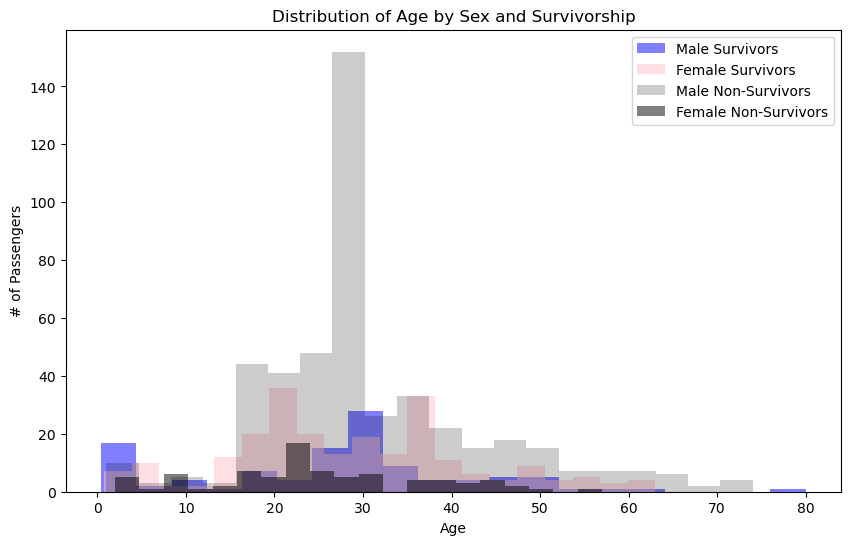

In [91]:
import matplotlib.pyplot as plt

male_survivors = titanic_data[(titanic_data['Sex'] == 1) & (titanic_data['Survived'] == 1)]['Age']
female_survivors = titanic_data[(titanic_data['Sex'] == 0) & (titanic_data['Survived'] == 1)]['Age']
male_unlucky = titanic_data[(titanic_data['Sex'] == 1) & (titanic_data['Survived'] == 0)]['Age']
female_unlucky = titanic_data[(titanic_data['Sex'] == 0) & (titanic_data['Survived'] == 0)]['Age']

plt.figure(figsize=(10, 6))
plt.hist(male_survivors, bins=20, color='blue', alpha=0.5, label='Male Survivors', histtype='stepfilled')
plt.hist(female_survivors, bins=20, color='pink', alpha=0.5, label='Female Survivors', histtype='stepfilled')
plt.hist(male_unlucky, bins=20, color='black', alpha=0.2, label='Male Non-Survivors', histtype='stepfilled')
plt.hist(female_unlucky, bins=20, color='black', alpha=0.5, label='Female Non-Survivors', histtype='stepfilled')

plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.title('Distribution of Age by Sex and Survivorship')
plt.legend(loc='upper right')
plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [141]:
label = ['Survived']
# features = ['Sex', 'Age', 'Pclass', 'Fare', 'Family_Size']
features = ['Sex', 'Age', 'Pclass']

# We want to use all the informative data we can get

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_data[features], titanic_data[label], test_size = 0.2)

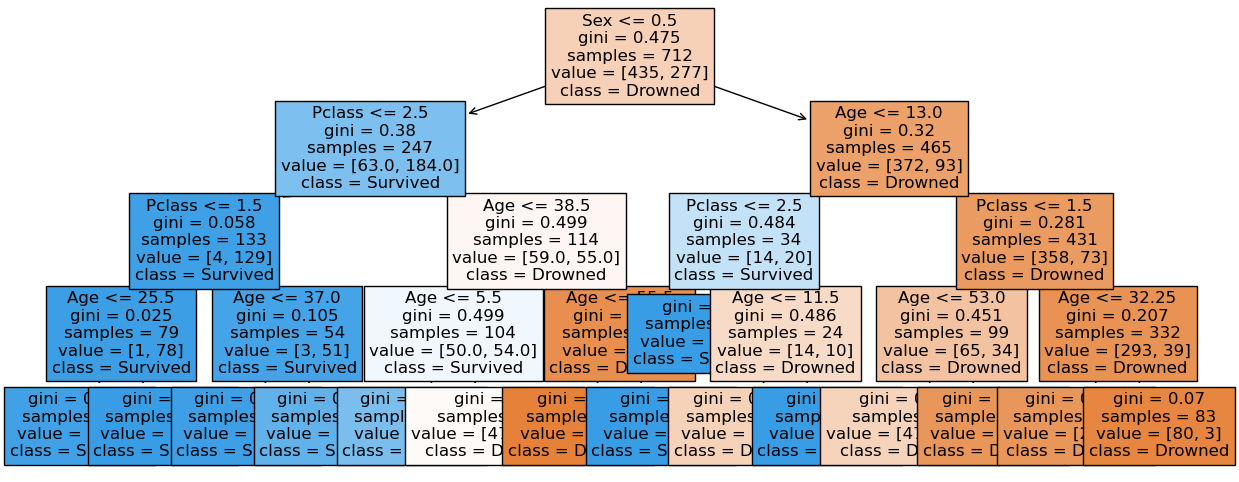

In [143]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth = 4)
tree_clf.fit(X_train, y_train)

fig, ax = plt.subplots(1,1, figsize = (15, 6))
plot_tree(tree_clf, feature_names = features, class_names = ['Drowned', 'Survived'],
          filled = True, fontsize = 12)
plt.show()
#tree_clf.__dict__

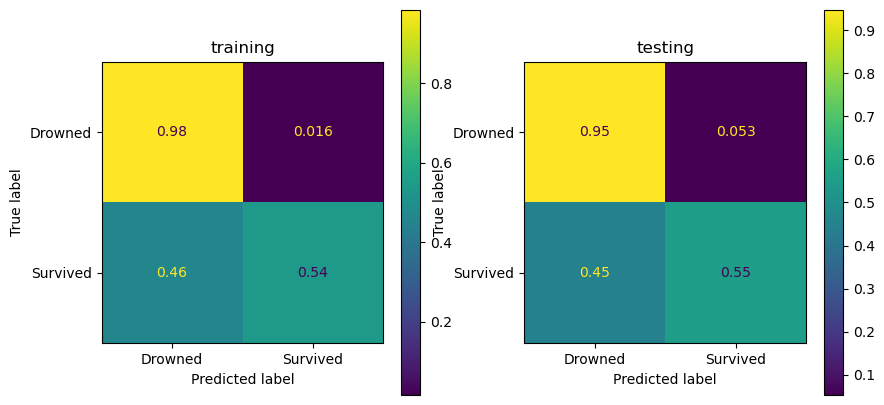

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay

y_tree_train = tree_clf.predict(X_train)
y_tree_test = tree_clf.predict(X_test)

fix, ax = plt.subplots(1, 2, figsize = (10,5))

ConfusionMatrixDisplay.from_predictions(y_train, y_tree_train, 
                                        normalize = 'true', 
                                        display_labels = ['Drowned', 'Survived'], 
                                        ax = ax[0])

ConfusionMatrixDisplay.from_predictions(y_test, y_tree_test, 
                                        normalize = 'true', 
                                        display_labels = ['Drowned', 'Survived'], 
                                        ax = ax[1])

ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('Decision Tree')
plt.show()

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss.fit(X_train)

Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_test = y_test.values.ravel()

knn_clf = KNeighborsClassifier(n_neighbors = 15, metric = 'manhattan')
knn_clf.fit(Xs_train, ys_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

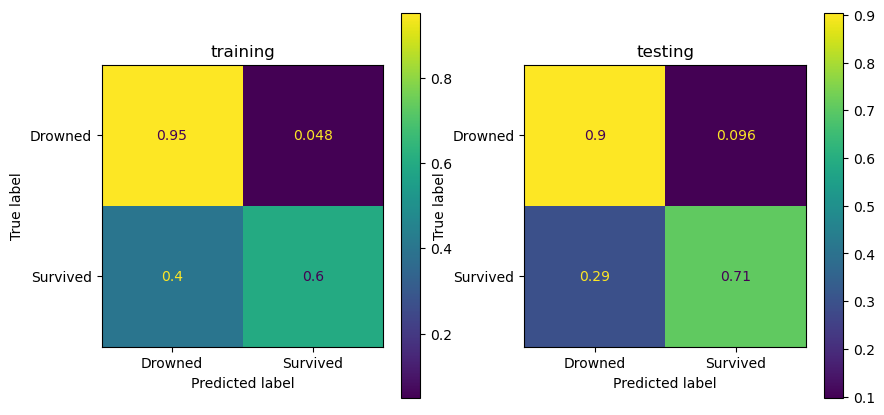

In [158]:
y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

fix, ax = plt.subplots(1, 2, figsize = (10,5))

ConfusionMatrixDisplay.from_predictions(y_train, y_knn_train, 
                                        normalize = 'true', 
                                        display_labels = ['Drowned', 'Survived'], 
                                        ax = ax[0])

ConfusionMatrixDisplay.from_predictions(y_test, y_knn_test, 
                                        normalize = 'true', 
                                        display_labels = ['Drowned', 'Survived'], 
                                        ax = ax[1])

ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('KNN')
plt.show()

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - Decision tree: training data better than test data
 -  KNN: training data better than test data


Which models did you fit and which worked better?
 
 - I fit the Decision tree model and the KNN model. I think KNN worked better because of the higher accuracy for predicting drowned and survived was greater than the decision tree.
 - Decision tree: high accuracy for predicting drowned passengers, moderately high accuracy for predicting survived passengers, low false positive for saying the passenger survived when they drowned, moderately low false positive for saying the passenger drowned when they survived
 - KNN: high accuracy for predicting drowned passengers, moderately high accuracy for predicting survived passengers, low false positive for saying the passenger survived when they drowned, moderately low false positive for saying the passenger drowned when they survived